<a href="https://colab.research.google.com/github/sneha86Gupta/Sms-Spam-Detection-Using-Machine-learning-algorithm/blob/main/Copy_of_sms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re
import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
sms = pd.read_csv('/content/Spam SMS Collection.txt', sep='\t', names=['label','message'])

In [ ]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms.shape

(5572, 2)

In [ ]:
sms.drop_duplicates(inplace=True)

In [ ]:
sms.reset_index(drop=True, inplace=True)

In [ ]:
sms.shape

(5169, 2)

In [ ]:
sms['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

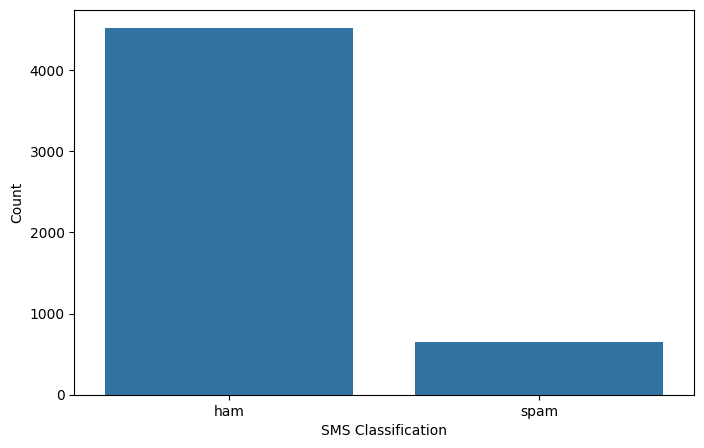

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=sms)
plt.xlabel('SMS Classification')
plt.ylabel('Count')
plt.show()

In [ ]:
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i])
    message = message.lower()
    words = message.split()
    words = [word for word in words if word not in set(stopwords.words('english'))]
    words = [ps.stem(word) for word in words]
    message = ' '.join(words)
    corpus.append(message)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [ ]:
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [ ]:
y

array([False, False,  True, ..., False, False, False])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Accuracy score for alpha=0.0 is: 97.29%
Accuracy score for alpha=0.1 is: 97.78%
Accuracy score for alpha=0.2 is: 97.97%
Accuracy score for alpha=0.3 is: 97.97%
Accuracy score for alpha=0.4 is: 97.97%
Accuracy score for alpha=0.5 is: 97.97%
Accuracy score for alpha=0.6 is: 97.97%
Accuracy score for alpha=0.7 is: 97.97%
Accuracy score for alpha=0.8 is: 97.87%
Accuracy score for alpha=0.9 is: 97.87%
Accuracy score for alpha=1.0 is: 97.68%
--------------------------------------------
The best accuracy is 97.97% with alpha value as 0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

array([False, False, False, ..., False, False, False])

In [ ]:
acc_s = accuracy_score(y_test, y_pred)*100
print("Accuracy Score {} %".format(round(acc_s,2)))


Accuracy Score 97.97 %


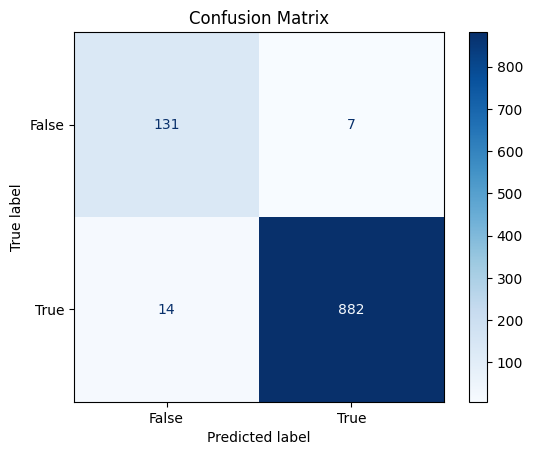

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report
matrix=confusion_matrix(y_test,y_pred,labels=[1,0])
#ddisplay confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_report = classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

       False       0.99      0.98      0.99       896
        True       0.90      0.95      0.93       138

    accuracy                           0.98      1034
   macro avg       0.95      0.97      0.96      1034
weighted avg       0.98      0.98      0.98      1034



In [ ]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [ ]:
def manual_testing(sms):
  result = ['Wait a minute, this is a SPAM!','Ohhh, this is a normal message.']
  if predict_spam(sms):
    print(result[0])
  else:
    print(result[1])

In [ ]:
sms=str(input())
manual_testing(sms)

Dear Customer, Your A/C XXXXX225053 has a debit by transfer of Rs 236.00 on 23/04/24. Avl Bal Rs 691.50.-SBI


In [ ]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(classifier, open('model.pkl', 'wb'))

In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.7 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('/content/model.pkl')
vectorizer = joblib.load('/content/vectorizer.pkl')
def main():
    st.title('SMS SPAM Detection App')
    user_input = st.text_area("Enter the SMS text:", "")

    if st.button("Check"):
        if user_input:
            input_vectorized = vectorizer.transform([user_input])
            prediction = model.predict(input_vectorized)
            if prediction[0] == 0:
                st.success("Ohhh, this is a normal message.")
            else:
                st.error("Wait a minute, this is a SPAM!")
        else:
            st.warning("Please enter some text.")

if __name__ == '__main__':
    main()


Writing app.py


In [ ]:
! wget -q -O - ipv4.icanhazip.com

34.141.228.179


In [ ]:
!streamlit run /content/app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.141.228.179:8501

npx: installed 22 in 2.953s
your url is: https://brave-moose-talk.loca.lt
